In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import torch
from torch.autograd import Variable
from torch import Tensor
import io
import requests
from torch import nn
import geopandas as gpd

tqdm().pandas()
%matplotlib notebook
%run utils.py

In [2]:
gdf = gpd.read_file('data/line.geojson')

,OBJECTID,Street,SAFStreetName,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,...,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,Shape__Length,geometry
0,1,EAST 168 STREET,,0,U,,B,,T,DOT,...,699,596,716,599,699,596,716,2251001000000,0.001297,LINESTRING (-73.9034682815071 40.8303620794707...
1,2,WEST 192 STREET,,0,U,,B,,A,DOT,...,98,63,99,58,98,63,99,2798401000000,0.000954,"LINESTRING (-73.901202101452 40.8666213684178,..."
2,3,UNION AVENUE,,0,U,,B,,W,DOT,...,1079,1016,1084,1017,1079,1016,1084,2728001000000,0.001752,LINESTRING (-73.9011781129234 40.8243971910923...
3,4,UNION AVENUE,BEHAGEN PLAYGROUND,0,U,,B,,W,DOT,...,,,,0,0,0,0,21279501000000N,0.001752,LINESTRING (-73.9011781129234 40.8243971910923...
4,5,DELAFIELD AVENUE,,6,U,,B,,T,DOT,...,4645,4600,4664,4601,4645,4600,4664,2187601000000,0.001840,"LINESTRING (-73.9069580625364 40.893616230432,..."
5,6,WEST 252 STREET,,0,U,,B,,T,DCP,...,,,,0,0,0,0,2814401000000,0.000059,LINESTRING (-73.9070665288923 40.8992824378204...
6,7,CLAREMONT PARKWAY,,0,U,,B,,T,DOT,...,439,400,416,401,439,400,416,2147601000000,0.000881,LINESTRING (-73.9053850046466 40.8397772683225...
7,8,TOPPING AVENUE,,0,U,,B,,W,DOT,...,1849,1800,1838,1801,1849,1800,1838,2718001000000,0.000802,LINESTRING (-73.9055885394703 40.8466972761627...
8,9,EAST 175 STREET,,0,U,,B,,T,DOT,...,299,260,298,261,299,260,298,2255001000000,0.000901,LINESTRING (-73.9055885394703 40.8466972761627...
9,10,WEST 234 STREET,,0,U,,B,,T,DOT,...,298,281,299,278,298,281,299,2805201000000,0.000871,LINESTRING (-73.90495672779829 40.882886505190...


<IPython.core.display.Javascript object>


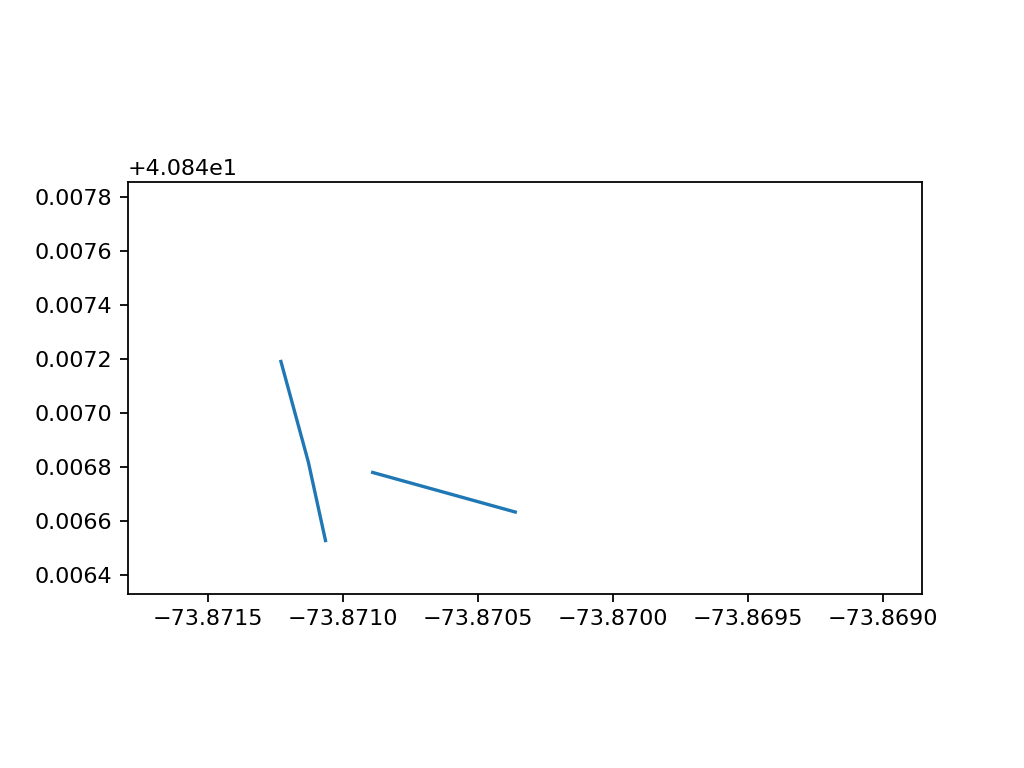

In [4]:
gdf['geometry'].plot()

In [19]:
gdf = gpd.read_file('data/NYC Street Centerline (CSCL).geojson')

In [27]:
manhattan = gdf[gdf['borocode']=='1']

In [44]:
manhattan.columns

Index(['rw_type', 'l_low_hn', 'pre_direct', 'st_width', 'r_zip', 'r_low_hn',
       'bike_lane', 'post_type', 'r_blkfc_id', 'bike_trafd', 'frm_lvl_co',
       'post_modif', 'pre_type', 'full_stree', 'l_blkfc_id', 'shape_leng',
       'to_lvl_co', 'modified', 'status', 'post_direc', 'r_high_hn', 'l_zip',
       'snow_pri', 'borocode', 'trafdir', 'pre_modifi', 'st_label',
       'physicalid', 'st_name', 'created', 'l_high_hn', 'geometry'],
      dtype='object')

In [47]:
mh = manhattan[['physicalid','st_name','trafdir','geometry']]

<IPython.core.display.Javascript object>


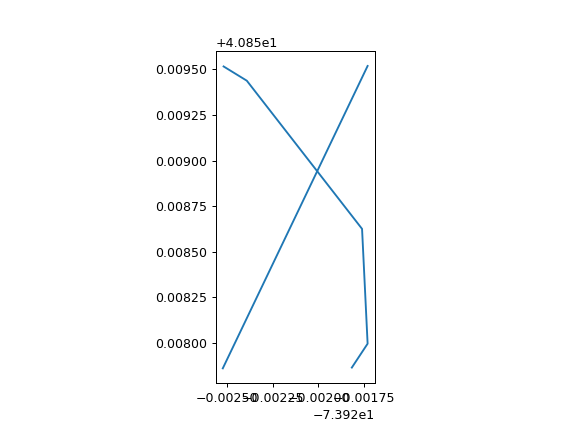

In [97]:
mh['geometry'].iloc[0:1].plot()
plt.plot([-73.92252465, -73.9217305], [40.85786022,  40.8595185])

In [75]:
st = mh['geometry'].iloc[0:1]

In [94]:
st.bounds[['miny','maxy']].as_matrix()

array([[ 40.85786022,  40.8595185 ]])

In [98]:
st

16    (LINESTRING (-73.92252465335248 40.85951850445...
Name: geometry, dtype: object

In [107]:
b = st.boundary.iloc[0]

In [119]:
c = b[0].coords

In [121]:
c.xy

(array('d', [-73.92252465335248]), array('d', [40.85951850445461]))

In [ ]:
b[0].coords

<IPython.core.display.Javascript object>


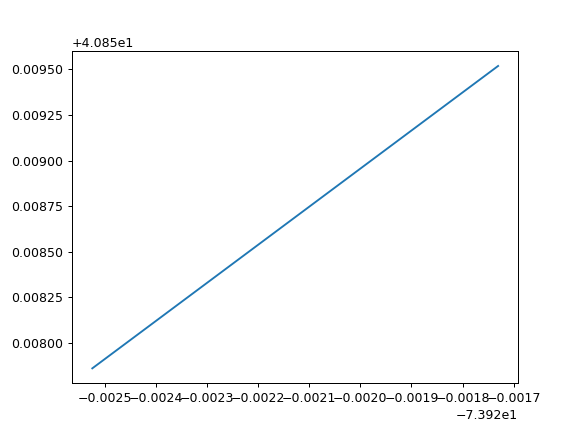

<IPython.core.display.Javascript object>


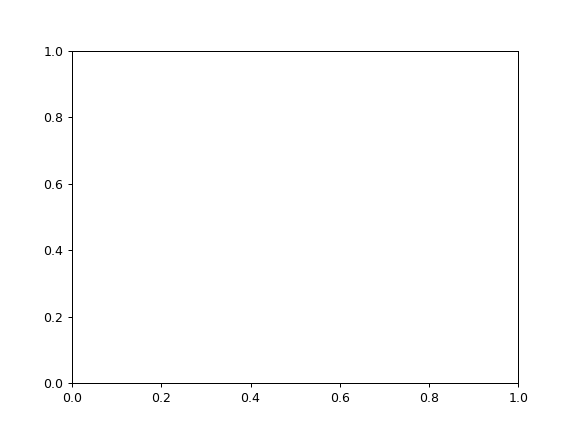

<IPython.core.display.Javascript object>


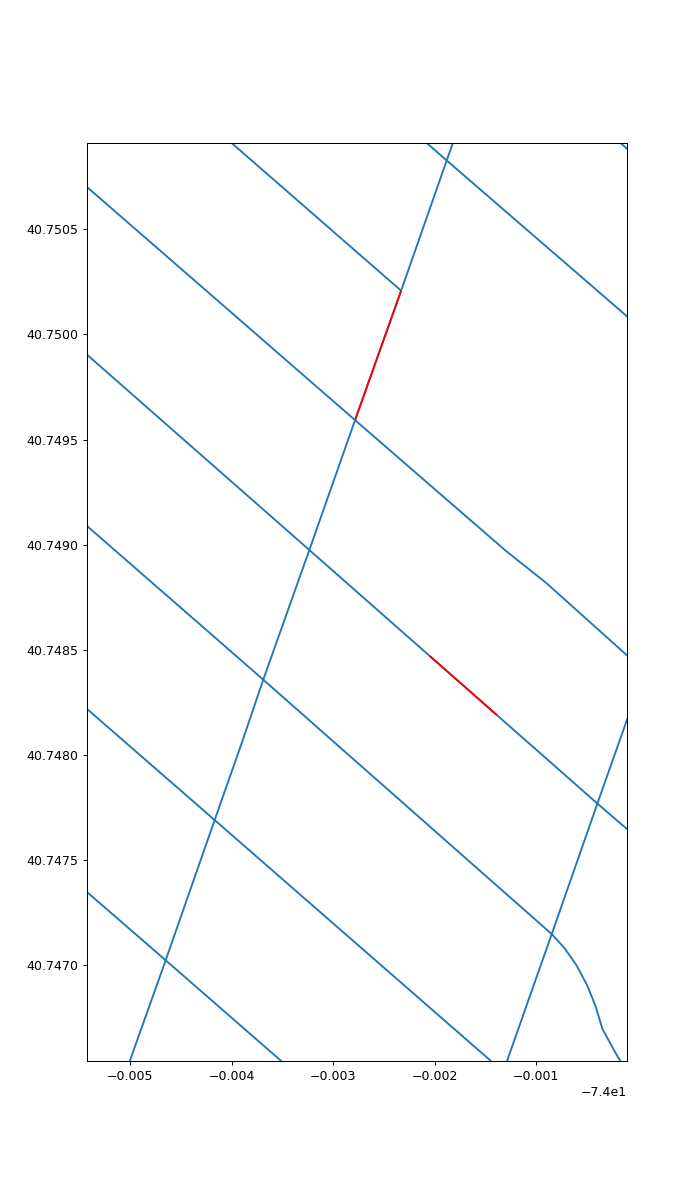

In [134]:
fig, ax = plt.subplots()
manhattan[manhattan['trafdir'] != 'NV']['geometry'].plot(ax=ax)
manhattan[manhattan['trafdir'] != 'NV']['geometry'].iloc[:1000].plot(ax=ax, color='r')

In [137]:
len(manhattan[manhattan['trafdir'] != 'NV'])

11232

In [ ]:
geo = pd.read_csv('data/Centerline.csv')
df_iter = pd.read_csv('data/yellow_tripdata_2009-01.csv', chunksize=10000)
df = next(df_iter)

In [ ]:
geo['the_geom'].iloc[0]

In [52]:
%run network.py

In [53]:
coords = [(0,0), (0,1), (1,0), (1,1)]
streets = [(0,1), (0,2), (1,3), (0,3)]
network = Network(coords)

In [54]:
for n1, n2 in streets:
    network.add_streets_from_nodes(n1, n2, False)

In [55]:
print(network.streets[0])

<Street 0: twoway = False; from 0 to 1>


<IPython.core.display.Javascript object>


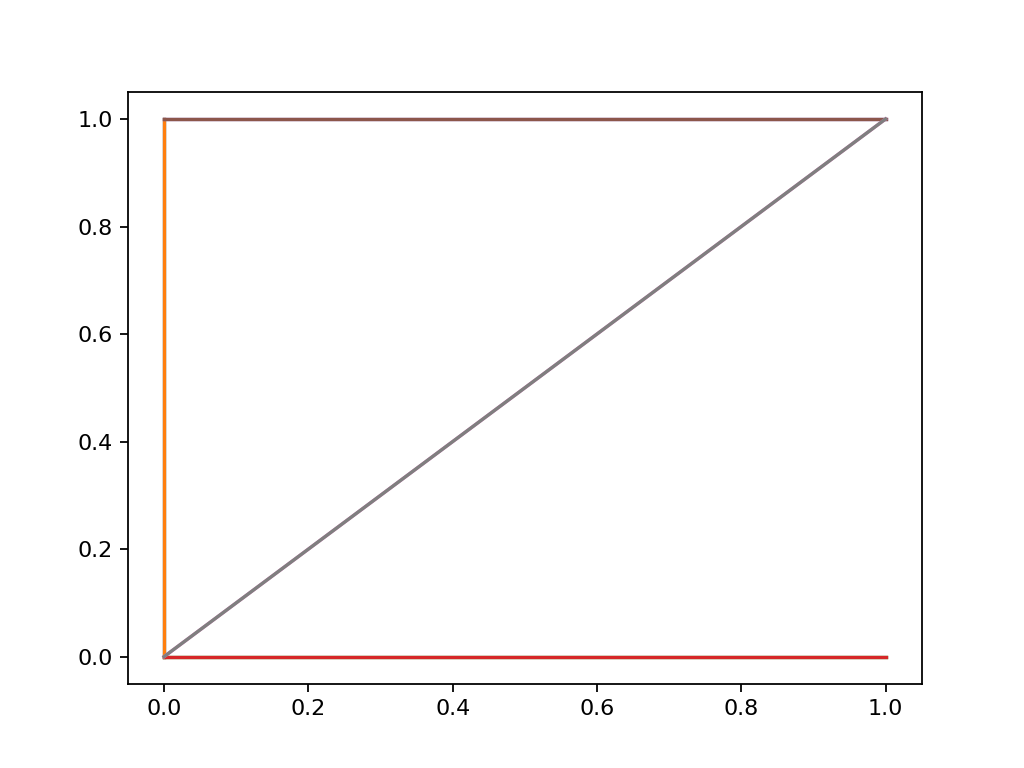

In [18]:
plt.figure()
network.plot()